<a href="https://colab.research.google.com/github/JGPB0/CS/blob/main/Lab9/CS_Lab9_ParedesJimmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARP Cache Poisoning Attack Lab

## Paredes Jimmy

## Task 1: ARP Cache Poisoning

#### Task 1.A (using ARP request). On host M, construct an ARP request packet to map B’s IP address to Ms MAC address. Send the packet to A and check whether the attack is successful or not.

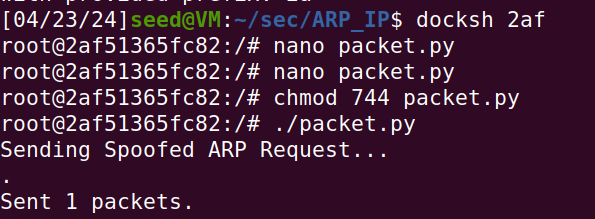


#### Task 1.B (using ARP reply). On host M, construct an ARP reply packet to map B’s IP address to M’s MAC address. Send the packet to A and check whether the attack is successful or not. Try the attack under the following two scenarios, and report the results of your attack:
  * Scenario 1: B’s IP is already in A’s cache.
  * Scenario 2: B’s IP is not in A’s cache. You can use the command "arp -d a.b.c.d" to remove the ARP cache entry for the IP address a.b.c.d


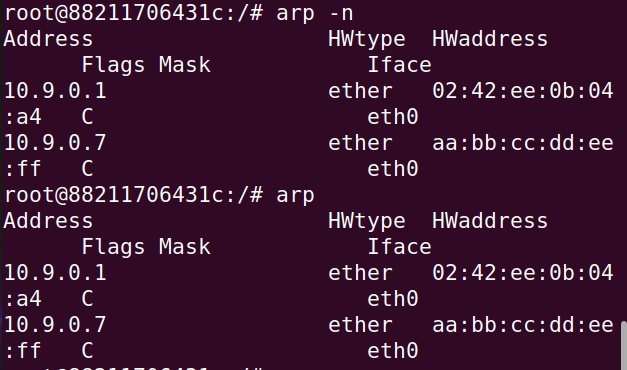

As it is possible to see in the figure above, the IPs addresses are already stored on the cache of the host. If the IPs addresses are not stored, they will be automatically stored on the cache.

From the figure above, it is possible to see that the MAC Address has also been changed by the attacker.

## Task 2: MITM Attack on Telnet using ARP Cache Poisoning

#### Step 1 (Launch the ARP cache poisoning attack).

First, we have to identity Attacker MAC address in order to usi this MAC address:

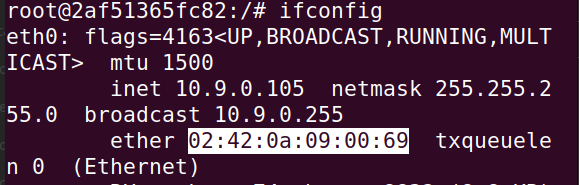

Then, to obtain the MAC adresses of host A and B, it was send a ping from host M (attacker) and then with the command line arp -n it was possible to obtain the necessary MAC addresses:

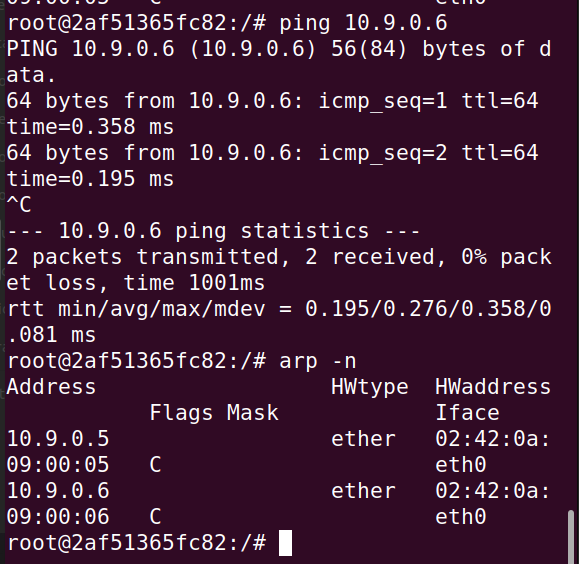

It is important to consider that the ping have to be sent from host M (attacker) to hosts A and B (10.9.0.5 and 10.9.0.6 respectively).

The python code to perform this attack is the following:

In [ ]:
from scapy.all import *

target_IP = '10.9.0.5'
target_MAC = '02:42:0a:09:00:05'
fake_ID = '10.9.0.6'
fake_MAC = '02:42:0a:09:00:69'

print('Sending Spoofed ARP Request...')

ether = Ether()
ether.dst = target_MAC
ether.src = fake_MAC

arp = ARP()
arp.psrc = fake_ID
arp.hwsrc = fake_MAC
arp.pdst = target_IP
arp.op = 1
frame = ether/arp
sendp(frame)

where target_IP and target_MAC referst to the victim and fake_ID refes to tje IP address of the host we are trying to be, while fake_MAC address refers to the attacker's MAC address.

So, with that in mind, after sending the packet and testing from host A (the first victim) the following result is obtained showing that the expected goal was performed:

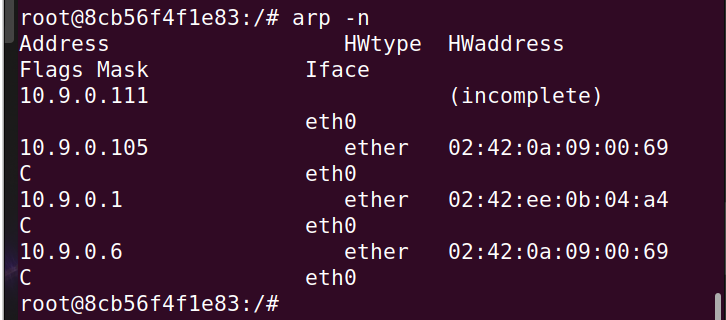

Now, the same process have to be performed for host B, the following result was obtained from that host:

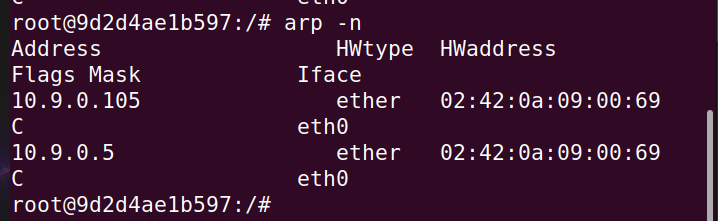

So, the results obtained are the ones that were expected for this task.

#### Step 2 (Testing). After the attack is successful, please try to ping each other between Hosts A and B, and report your observation. Please show Wireshark results in your report. Before doing this step, please make sure that the IP forwarding on Host M is turned off. You can do that with the following command: sysctl net.ipv4.ip_forward=0

The ping from host A to host B was success ful and it also shanges the MAC address changed before:

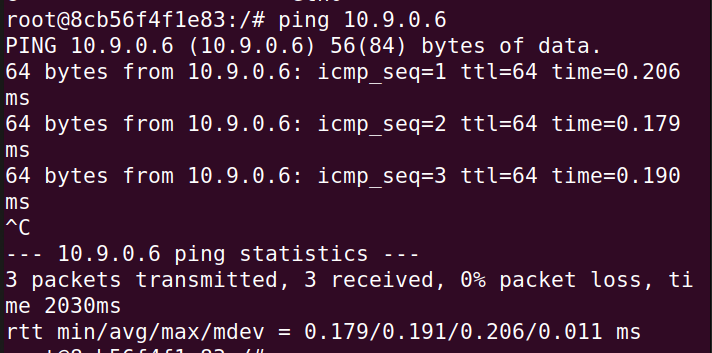

The ping from host B to host A was successful too and it changes the MAC address changed before:

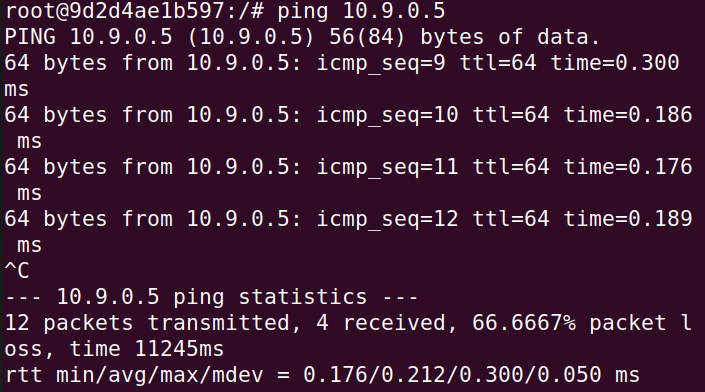

The ping from host B to host A presents packets loss.

#### Step 3 (Turn on IP forwarding). Now we turn on the IP forwarding on Host M, so it will forward the packets between A and B. Please run the following command and repeat Step 2. Please describe your observation.

The ping from host B to host A was the following:

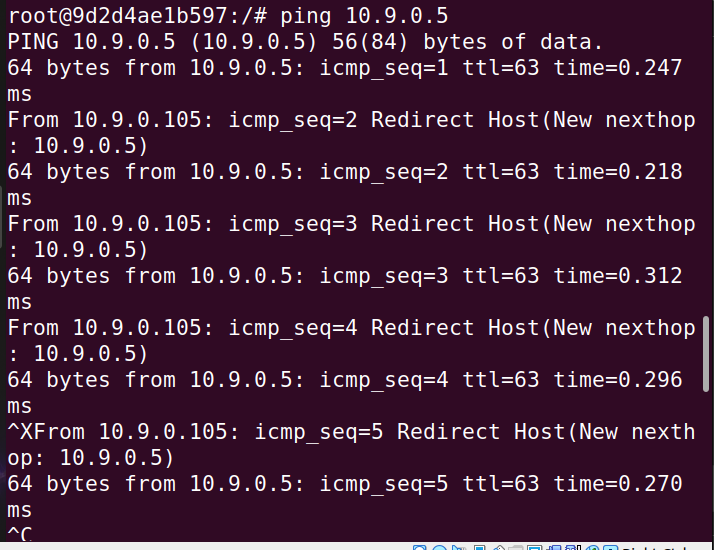

The same result is obtained by doing a ping from host A to host B. It is important to notice that after the first ping to each other, the next ping shows a successful ping, the same happen for both host when doing ping to each other.

The ping from host B to host A was successful on the second try, the same happens from host A to host B:

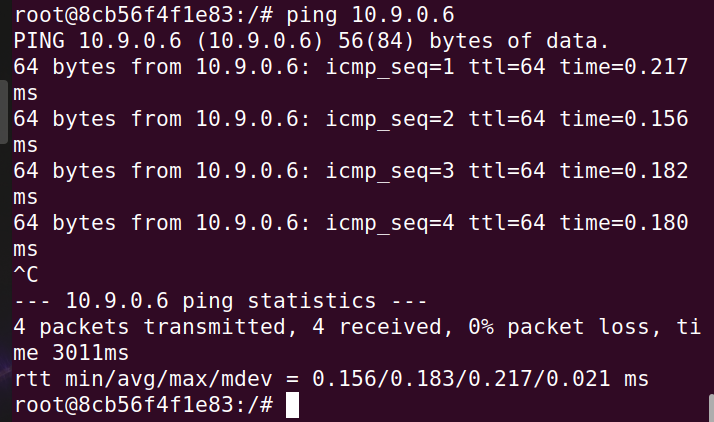

After his ping process, when running the command line arp -n from terminal we can observe that the MAC address of the other hosts has been changes to the iriginal one instead of the attacker's MAC address we have changed:

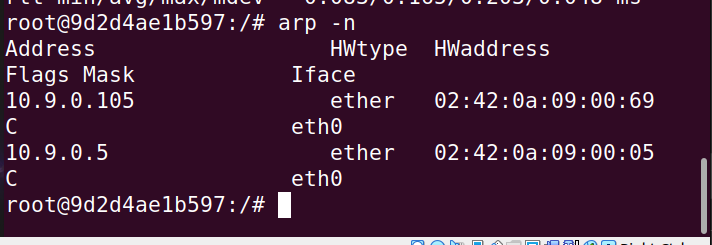